<img src="https://impact.stanford.edu/sites/default/files/styles/16_9_desktop/public/2022-11/facts%20fake%20news%20stock.jpeg?itok=ccxUF_Ji" style="width: 1500px;"/>

## Title: 📰Fake News Detection 📰



## I. 💬Intoduction💬

Fake news denotes a type of yellow press which intentionally presents misinformation or hoaxes spreading through both traditional print news media and recent online social media. In recent years, due to the booming developments of online social networks, fake news for various commercial and political purposes has been appearing in large numbers and widespread in the online world. With deceptive words, online social network users can get infected by these online fake news easily, which has brought about tremendous effects on the offline society already.

So, it is important to detect fake and real news.

## II. ▶Importing Libraries

In [2]:
#Basic setup
import pandas as pd
import numpy as np

#Data Visualiztion
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

#ML toolkits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import re
%matplotlib inline

## III. ▶Importing data 

In [3]:
df_fake = pd.read_csv("C:/Users/Lenovo/Desktop/Project/Fake News Detection/Fake.csv/Fake.csv")
df_true = pd.read_csv("C:/Users/Lenovo/Desktop/Project/Fake News Detection/True.csv/True.csv")
df_fake.shape,df_true.shape

((23481, 4), (21417, 4))

## IV. 🔍Data Preparation and Cleaning🔍

In [4]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [5]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

Checking for unique values for subject. We want both data frames to have a similar distribution.

In [6]:
df_fake.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [7]:
df_true.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [8]:
display(df_true.head())

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [9]:
display(df_fake.head())

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

Looks like a simple dataset that contains four columns, namely the article's title, the actual body of text, the subject, and date. There may not even be that much data cleaning to do, given how simple the dataset is!

In [10]:
display(df_fake.info())
print('\n')
display(df_true.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


None

In [11]:
display(df_fake.subject.value_counts())
print('\n')
display(df_true.subject.value_counts())

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

Drop the date from the dataset, I don't think there is a strong correlation between date and validity of the news. As we see above, subjects are not distributed evenly. We do not want to influence the accuracy of our classifier. Therefore, we need to drop that as well. 

In [12]:
df_fake.drop(['date', 'subject'], axis=1, inplace=True)
df_true.drop(['date', 'subject'], axis=1, inplace=True)

## Inserting a column "class" as target feature

In [13]:
df_fake['class'] = 0 
df_true['class'] = 1

0 denotes fake news and 1 for true news

In [14]:
print('Difference in news articles:',len(df_fake)-len(df_true))

Difference in news articles: 2064


## Merging True and Fake Dataframes

In [15]:
news_df = pd.concat([df_fake, df_true], ignore_index=True, sort=False)
news_df

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
44893  'Fully committed' NATO backs new U.S. approach...   
44894  LexisNexis withdrew two products from Chinese ...   
44895  Minsk cultural hub becomes haven from authorities   
44896  Vatican upbeat on possibility of Pope Francis ...   
44897  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text  class  
0      Donald Trump just couldn t wish all Americans ...      0  
1      House Intelligence Committee Chairman Devin Nu...      0  
2      On Friday, it was revealed that former Milwauk...      0  
3      On Christmas day, Donald Trump announced that ...      0  
4      Pope Francis used his annual Christmas Day mes...      0  
...                                                  ...    ...  
44893  BRUSSELS (Reuters) - NATO allies on Tuesday we...      1  
44894  LONDON (Reuters) - LexisNexis, a provider of l...      1  
44895  MINSK (Reuters) - In the shadow of disused Sov...      1  
44896  MOSCOW (Reuters) - Vatican Secretary of State ...      1  
44897  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...      1  

[44898 rows x 3 columns]

## Removing columns which are not required

In [16]:
news_df['text'] = news_df['title'] + news_df['text']
news_df.drop('title', axis=1, inplace=True)

## Splitting Training and Testing🛠️

In [17]:
X_train, X_test, y_train, y_test = train_test_split(news_df['text'],news_df['class'], test_size=0.25)
display(X_train.head())
print('\n')
display(y_train.head())

print("\nThere are {} documents in the training data.".format(len(X_train)))

13182    ANDREA MITCHELL STAMMERS Recalling Bill Clinto...
11404    RACHEL MADDOW Tries To Embarrass Trump By Expo...
11771    HYSTERICAL! NANCY PELOSI AND Fellow Dems Cluel...
36153    UAE's Gargash says Trump's decision on Jerusal...
7284      Pope Francis Just INFURIATED Conservatives By...
Name: text, dtype: object

13182    0
11404    0
11771    0
36153    1
7284     0
Name: class, dtype: int64


There are 33673 documents in the training data.


###  Creating a function to process the texts
Normalizing our data: lower case, get rid of extra spaces, and url links. 

In [48]:
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        
        # get rid of urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        
        # get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

X_train = normalize(X_train)
X_test = normalize(X_test)




In [49]:
X_train

['andrea mitchell stammers recalling bill clinton s faulty testimony in paula jones deposition video the clintons are afraid of the truth so be it if a special prosecutor is brought in to investigate them then that would be fine right they have nothing to hide right just like bill had nothing to hide with the paula jones case let s face it faulty testimony is their mojo they can t tell the truth because so much of their political career has been a lie',
 'rachel maddow tries to embarrass trump by exposing 2005 tax returns backfires big time gets destroyed on twitter here s maddow s tweet announcing her bombshell revelation on her show breaking we ve got trump tax returns tonight 9pm et msnbc seriously rachel maddow msnbc maddow march 14 2017just last week the new york times columnist nicholas kristoff urged irs employees sunday to break the law and leak donald trump s tax returns to his publication if you re in irs and have a certain president s tax return that you d like to leak my ad

In [19]:
X_test

['cbs poll shows clinton with 4 point lead vs trump in white house racewashington reuters a cbs news poll released on monday showed democratic presidential nominee hillary clinton holding a 4 point lead over republican donald trump 45 percent to 41 percent the survey of 1 753 u s adults was taken nov 2 6 and has a margin of error of plus or minus three percentage points a washington post abc poll released earlier on monday also found clinton with a 4 percentage point lead a separate bloomberg politics selzer co poll found a 3 point lead for the former secretary of state',
 'un celebrates its 70th anniversary with communist statue in nyc parkin case you hadn t heard obama signed a new un development plan to make america a socialist nation by 2030 yes it s true and the un is celebrating by unveiling a statue celebrating our global citizenship here are a few of the important points in the plan that spell out the shared responsibility with the globe and then information below about the sta

## V. Feature Extraction✔


>`Tf-idf` term weighting lets you assign importance to tokens that actually carry some information by balancing overall token frequency with its frequency across documents.

Below, I first initialize a `TfidfVectorizer` object. It takes as input the set of document strings and outputs the normalized tf-idf vectors; then, using `fit_transform` like any other transformers and predictors in scikit-learn, we can *fit* the vectorizer to data and *tranform* them. It has an option to use the `max_df` to indicate the cut-off document-frequency for stop words, if being used. Here, I will set the cut-off document-frequency to be 0.7, which is the lowest possible value that this parameter can take. The final output of fitting & transforming data will give a sparse matrix with the size of `n_samples` by `n_features`, i.e., `number of documents` by `number of unique words`.

## Converting text to vectors🔄

In [20]:
my_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

# fitting the vectorizer and transforming X_train into a tf-idf matrix,
# then used the same vectorizer to transform X_test
tfidf_train = my_tfidf.fit_transform(X_train)
tfidf_test = my_tfidf.transform(X_test)

tfidf_train

<33673x120456 sparse matrix of type '<class 'numpy.float64'>'
	with 5232506 stored elements in Compressed Sparse Row format>

As expected, we see that there are as many rows as the number of documents, and we have extracted over a hundred thousand features, or tokens.

As a side note, the output is in a `Compressed Sparse Row` format, which refers to how the resulting tf-idf matrix is stored in memory. Sparse matrices are matrices that contain few non-zero elements -- for example, as many non-zeros as number of rows or columns (i.e., the sparse matrix might contain one non-zero element in each row or each column). Because so many elements are zero, it's wasteful to store all the zero elements in memory. The compressed sparse row format presents a solution to this problem by storing the non-zero values and their locations instead. 


#### A] The first model we'll see is Logistic Regression

# 💡-Logistic Regression

In [21]:
LR = LogisticRegression()
LR.fit(tfidf_train,y_train)

LogisticRegression()

In [22]:
pred_lr = LR.predict(tfidf_test)

In [23]:
LR.score(tfidf_test,y_test)

0.983608017817372

In [24]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5928
           1       0.98      0.99      0.98      5297

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

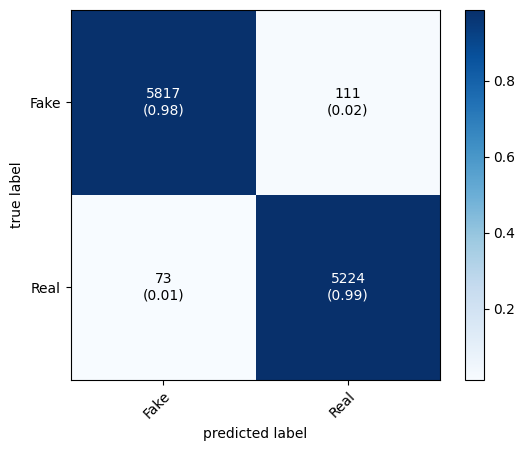

In [25]:
conf_mat = confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(conf_mat,
                      show_normed=True, colorbar=True,
                      class_names=['Fake', 'Real'])




#### B] The second model would be Decision Tree CLassifier

# 💡-Decision Tree Classification

In [26]:
DT = DecisionTreeClassifier()
DT.fit(tfidf_train,y_train)

DecisionTreeClassifier()

In [27]:
pred_dt = DT.predict(tfidf_test)

In [28]:
DT.score(tfidf_test,y_test)

0.996347438752784

In [29]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5928
           1       1.00      1.00      1.00      5297

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

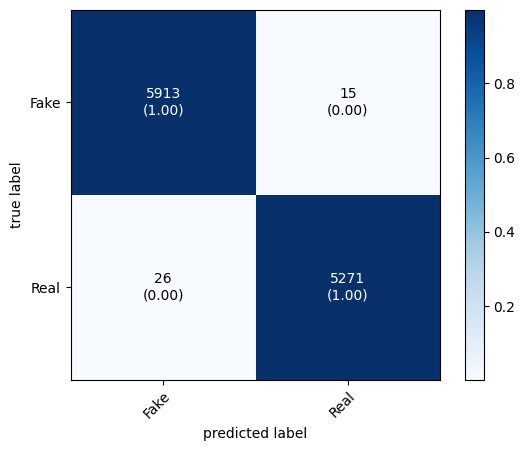

In [30]:
conf_mat = confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(conf_mat,
                      show_normed=True, colorbar=True,
                      class_names=['Fake', 'Real'])

#### C] The third model we'll classify through is Gradient Boosting

# 💡-Gradient Boosting Classification

In [50]:
GB = GradientBoostingClassifier()
GB.fit(tfidf_train,y_train)

GradientBoostingClassifier()

In [ ]:
predict_gb = GB.predict(tfidf_test)

In [ ]:
GB.score(tfidf_test,y_test)

0.9951893095768374

In [ ]:
print(classification_report(y_test,predict_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5852
           1       0.99      1.00      0.99      5373

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

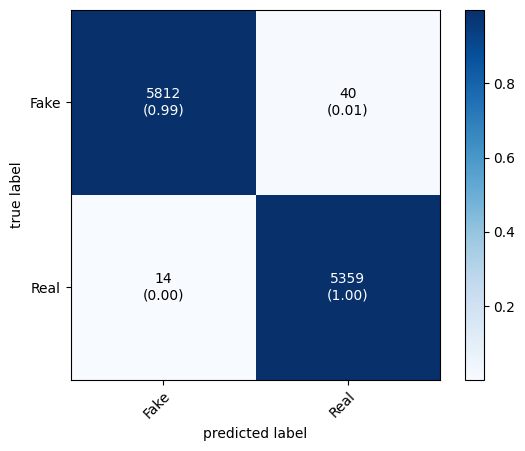

In [ ]:
conf_mat = confusion_matrix(y_test, predict_gb)
plot_confusion_matrix(conf_mat,
                      show_normed=True, colorbar=True,
                      class_names=['Fake', 'Real'])

#### D] The Fourth model used below is Random Forest Classifier

# 💡-Random Forest Classification

In [ ]:
RF = RandomForestClassifier()
RF.fit(tfidf_train,y_train)

RandomForestClassifier()

In [ ]:
pred_rf = RF.predict(tfidf_test)

In [ ]:
RF.score(tfidf_test,y_test)

0.9894877505567928

In [ ]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5852
           1       0.99      0.99      0.99      5373

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

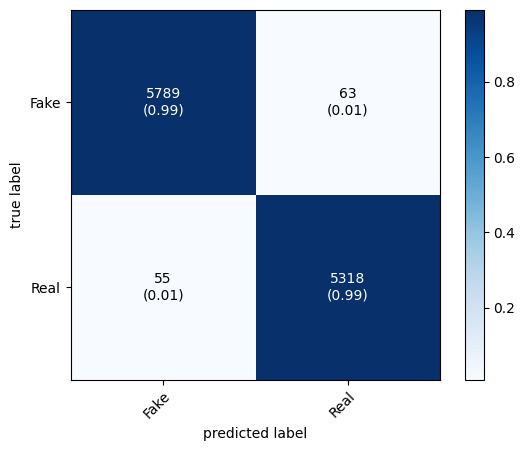

In [ ]:
conf_mat = confusion_matrix(y_test, pred_rf)
plot_confusion_matrix(conf_mat,
                      show_normed=True, colorbar=True,
                      class_names=['Fake', 'Real'])

In [ ]:
acc_sc1 =LR.score(tfidf_test,y_test)
acc_sc2 =DT.score(tfidf_test,y_test)
acc_sc3 =RF.score(tfidf_test,y_test)
acc_sc4 =GB.score(tfidf_test,y_test)
 




labels = {'LogisticRegression':acc_sc1,'DecisionTreeClassifier':acc_sc2,'RandomForestClassifier':acc_sc3,'GradientBoostingClassifier':acc_sc4}
for model,accuracy in labels.items():
    print(str(model)+' : '+str(accuracy))

LogisticRegression : 0.9851224944320712
DecisionTreeClassifier : 0.9948329621380846
RandomForestClassifier : 0.9894877505567928
GradientBoostingClassifier : 0.9951893095768374


<BarContainer object of 4 artists>

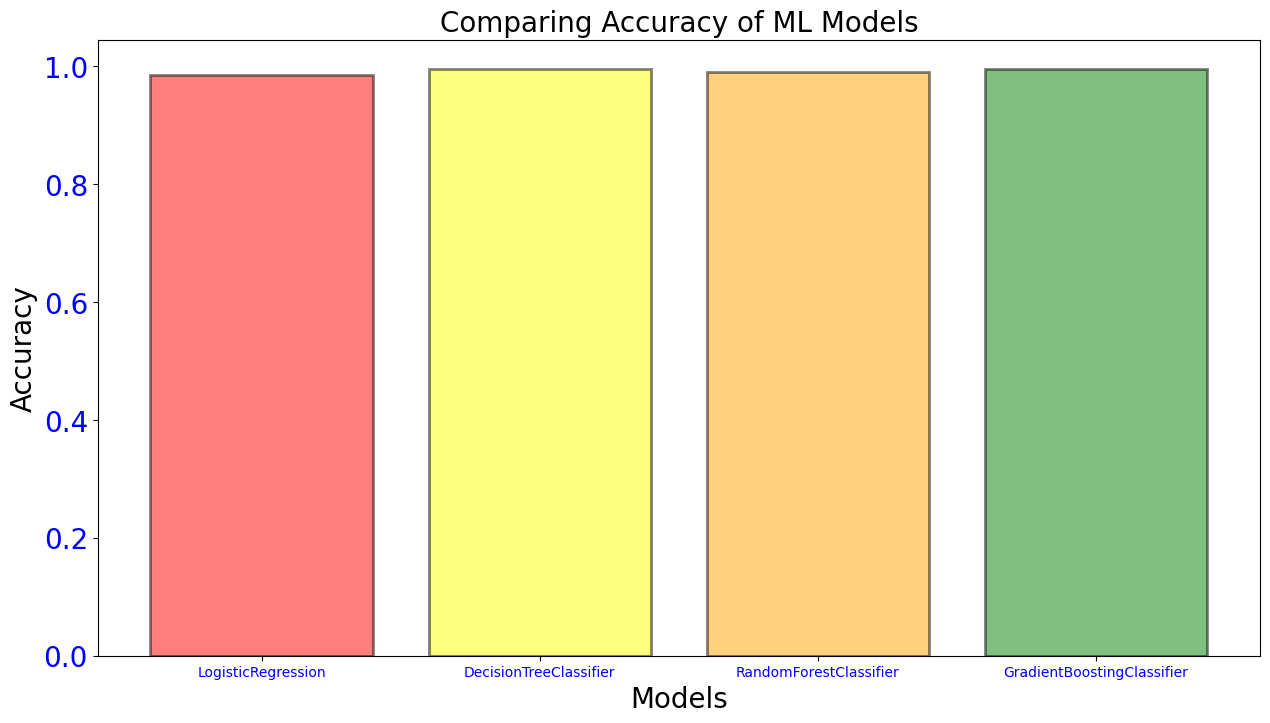

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['red','yellow','orange','green','magenta','cyan']
plt.xticks(fontsize=10,color='blue')
plt.yticks(fontsize=20,color='blue')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5)